## How to do image correction of old Dutch weather journals like a pro 😎

**Brainpower:** Jacco & Ahmad    |    **Notebook:** Irene    |     June 2024

This notebook illustrates the image correction process carried out by Jacco and Ahmad during the Innovation Weeks 2024. We take one sheet from the St. Eustatius' 1910 weather journal to illustrate each step of the process. 

### Imports and settings for the program

In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append("/home/jovyan/work/outdoors/data_rescue_iw24/")

from tools.helpers import get_filenames
from tools.image import read_image, save_image
from tools.calibrate import calibrate, get_calibration_settings, undistort_image
from tools.TableExtractor import TableExtractor

from pathlib import Path
import os
import logging

import gif
import cv2
import time
import itertools
import matplotlib.pyplot as plt
from IPython.display import display,Image

In [3]:
CALIBRATE = False
OVERWRITE = False

# Path to image to be corrected
input_dir = "/home/jovyan/work/outdoors/sample-data/logbooks/raw/st-eustatius/1911/"
output_dir = "/home/jovyan/work/outdoors/sample-data/logbooks/corrected/st-eustatius/1911/"
calibration_dir = "/home/jovyan/work/outdoors/data_rescue_iw24/calibration"

file_in = r"st-eustatius_1911_0001.CR3"
file_ou = r"st-eustatius_1911_0001_corrected.jpg"
path_in = os.path.join(input_dir, file_in)
path_ou = os.path.join(output_dir, file_ou)
print(path_ou)
image = read_image(path_in)

if CALIBRATE:
    mtx, dist, newcameramtx, roi = calibrate(calibration_dir)
mtx, dist, newcameramtx, roi = get_calibration_settings(calibration_dir)

/home/jovyan/work/outdoors/sample-data/logbooks/corrected/st-eustatius/1911/st-eustatius_1911_0001_corrected.jpg


### Checking the original data

Text(0.5, 1.0, 'St. Eustatius Weather Journal (Jan 1911)')

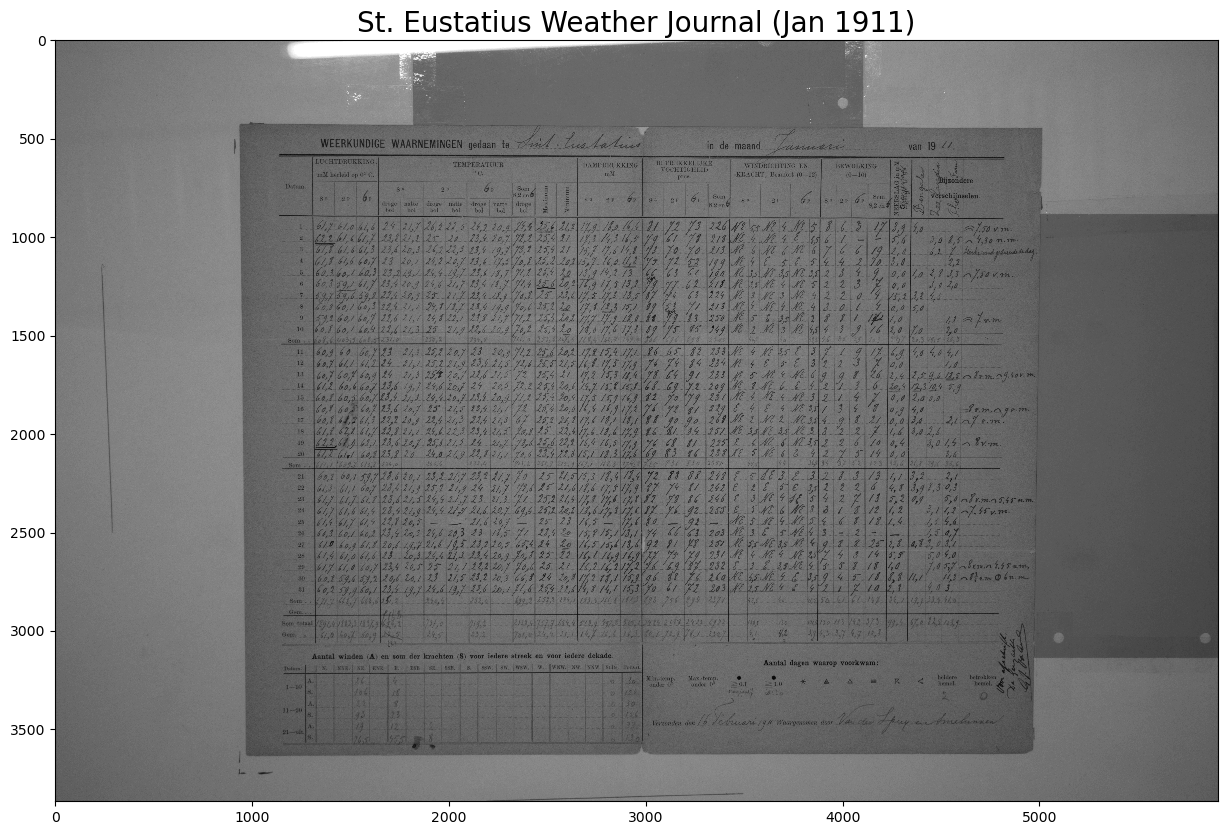

In [4]:
path_ori = "/home/jovyan/work/outdoors/sample-data/logbooks/corrected/st-eustatius/1911/steps/0_original.jpg"
fig, ax = plt.subplots(figsize=(15,12)) 
img = cv2.imread(path_ori, 0)
ax.imshow(img, interpolation="None",  cmap=plt.cm.gray)
ax.set_title("St. Eustatius Weather Journal (Jan 1911)", size=20)

### Running the image correction process

This process applies a number of sequential steps to correct the image. The image is first converted to grayscale and then we apply a convolution to ensure the brightness level is uniform across the document. We detect the border of the document by taking the mean across the horizontal and vertical axes and then capping the image at the first peak from the `top`, `left`, `right` and `bottom`. We applied to this cropped image a number of transformations (e.g. inversion, dilation, contours) to find...

In [5]:
image = undistort_image(image, mtx, dist, newcameramtx, roi)
table_extractor = TableExtractor(image, output_dir, path_in)
table_base = table_extractor.find_with_min_area(threshold_start=40, threshold_end=120, area_percentage_min=0.45, area_percentage_max=0.85)

if table_base is not None:
    save_image(table_base, path_ou)


DEBUG:TableExtractor:Finding threshold (40) --> area percentage: 0.030412660916875157%
DEBUG:TableExtractor:Finding threshold (41) --> area percentage: 0.023584703202386623%
DEBUG:TableExtractor:Finding threshold (42) --> area percentage: 0.023829966596877552%
DEBUG:TableExtractor:Finding threshold (43) --> area percentage: 0.026138070327176112%
DEBUG:TableExtractor:Finding threshold (44) --> area percentage: 0.02430735427544025%
DEBUG:TableExtractor:Finding threshold (45) --> area percentage: 0.02418910228166784%
DEBUG:TableExtractor:Finding threshold (46) --> area percentage: 0.02851186960957046%
DEBUG:TableExtractor:Finding threshold (47) --> area percentage: 0.04907895711902405%
DEBUG:TableExtractor:Finding threshold (48) --> area percentage: 0.04907895711902405%
DEBUG:TableExtractor:Finding threshold (49) --> area percentage: 0.1473178958713236%
DEBUG:TableExtractor:Finding threshold (50) --> area percentage: 0.1466894084229406%
DEBUG:TableExtractor:Finding threshold (51) --> area

Perform camera calibration to identify the distortion of the image

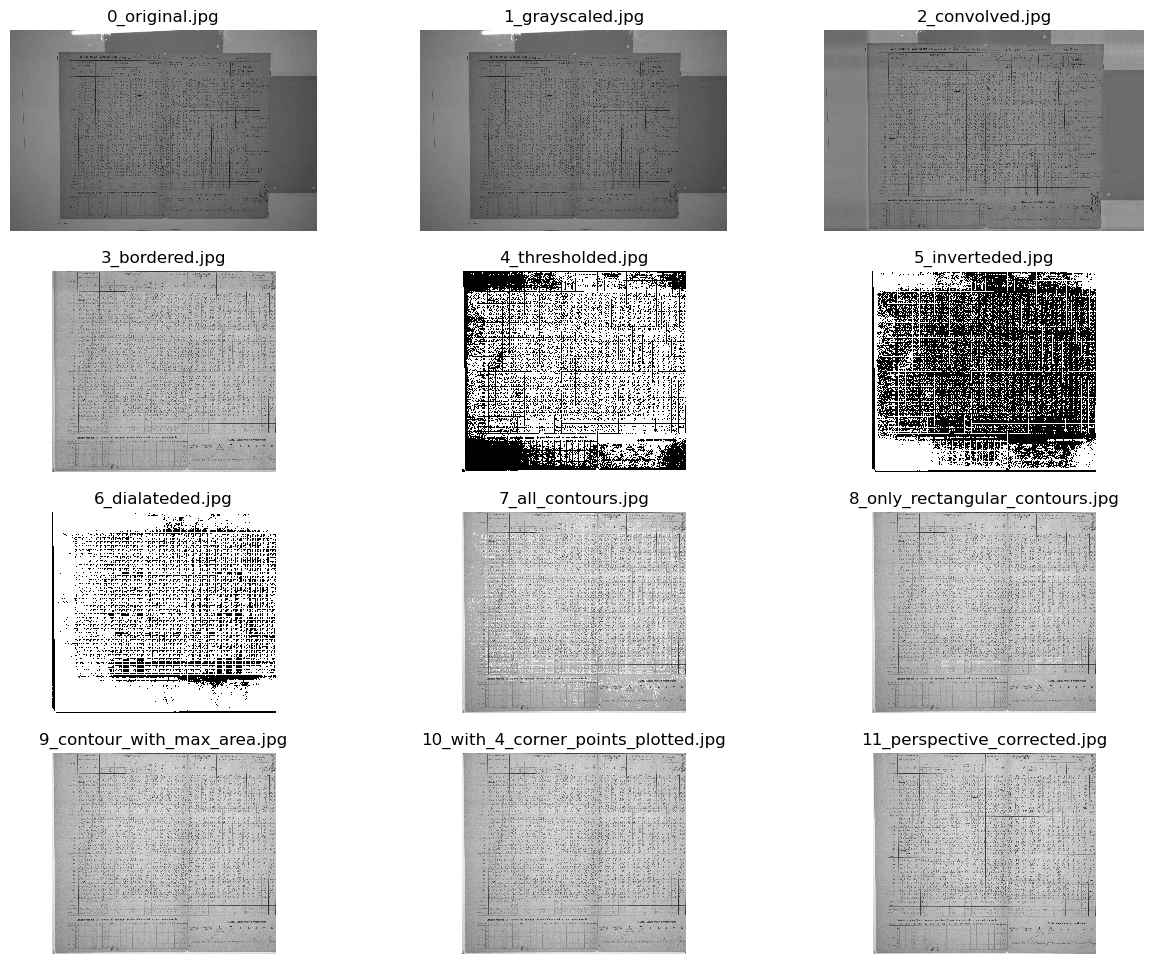

In [6]:

list_of_jpgs = ["0_original.jpg", "1_grayscaled.jpg", "2_convolved.jpg", "3_bordered.jpg", "4_thresholded.jpg", 
                "5_inverteded.jpg", "6_dialateded.jpg", "7_all_contours.jpg", "8_only_rectangular_contours.jpg", 
                "9_contour_with_max_area.jpg", "10_with_4_corner_points_plotted.jpg", "11_perspective_corrected.jpg"]
i = 0
nrows = range(0, 4)
ncols = range(0, 3)
pairs = list(itertools.product(nrows, ncols))

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,12)) 
plt.subplots_adjust(hspace=0.2)
for i in range(len(list_of_jpgs)):
    r, c = pairs[i]
    cur_file = list_of_jpgs[i]
    path_cur = os.path.join(output_dir, "steps", cur_file)
    img = cv2.imread(path_cur, 0)
    ax[r, c].imshow(img, interpolation="None",  cmap=plt.cm.gray)
    ax[r, c].set_title(cur_file, size=12)
    ax[r, c].set_axis_off()
    

In [7]:
@gif.frame
def show_image(img, title, fmt='jpg'):
    plt.title(title)
    plt.imshow(img, interpolation="None",  cmap=plt.cm.gray)

list_of_jpgs = ["0_original.jpg", "1_grayscaled.jpg", "2_convolved.jpg", "3_bordered.jpg", "4_thresholded.jpg", 
                "5_inverteded.jpg", "6_dialateded.jpg", "7_all_contours.jpg", "8_only_rectangular_contours.jpg", 
                "9_contour_with_max_area.jpg", "10_with_4_corner_points_plotted.jpg", "11_perspective_corrected.jpg"]
i = 0
plt.clf()
frames = []
for i in range(len(list_of_jpgs)):
    cur_file = list_of_jpgs[i]
    path_cur = os.path.join(output_dir, "steps", cur_file)
    img = cv2.imread(path_cur, 0)
    frames.append(show_image(img, cur_file))
    
gif.save(frames, output_dir + '/example.gif', duration=1500)

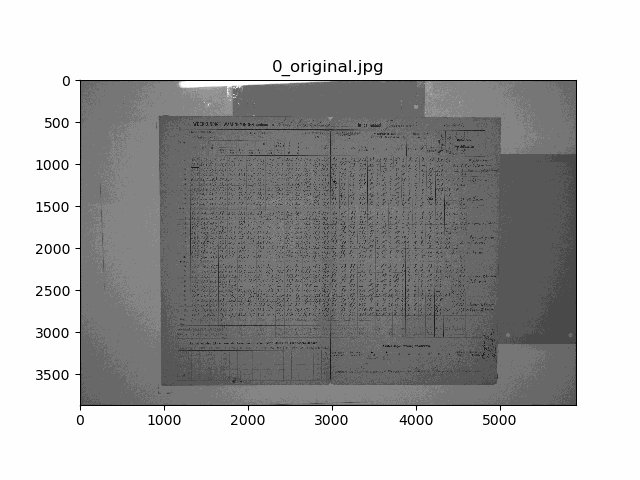

In [8]:
from IPython.display import Image
with open(output_dir + '/example.gif','rb') as file:
    display(Image(file.read()))
